<a href="https://colab.research.google.com/github/ibudeX/Energy-Consumption-Prediction/blob/main/Energy_Consumption_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
import os
import kagglehub

from sklearn.model_selection import train_test_split

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrsimple07/energy-consumption-prediction")

print("Path to dataset files:", path)

100%|██████████| 53.6k/53.6k [00:00<00:00, 12.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mrsimple07/energy-consumption-prediction/versions/1


In [ ]:
os.listdir(path)

['Energy_consumption.csv']

In [ ]:
data = pd.read_csv(os.path.join(path, 'Energy_consumption.csv'))
data.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [ ]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", data.shape)

# Check the data types of each column
print("\nData types:")
print(data.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# View summary statistics
print("\nSummary statistics:")
print(data.describe())

Shape of the DataFrame: (1000, 11)

Data types:
Timestamp             object
Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
DayOfWeek             object
Holiday               object
EnergyConsumption    float64
dtype: object

Missing values per column:
Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

Summary statistics:
       Temperature     Humidity  SquareFootage    Occupancy  RenewableEnergy  \
count  1000.000000  1000.000000    1000.000000  1000.000000      1000.000000   
mean     24.982026    45.395412    1500.052488     4.581000        15.132813   
std       2.836850     8.518905     288.418873     2.865598     

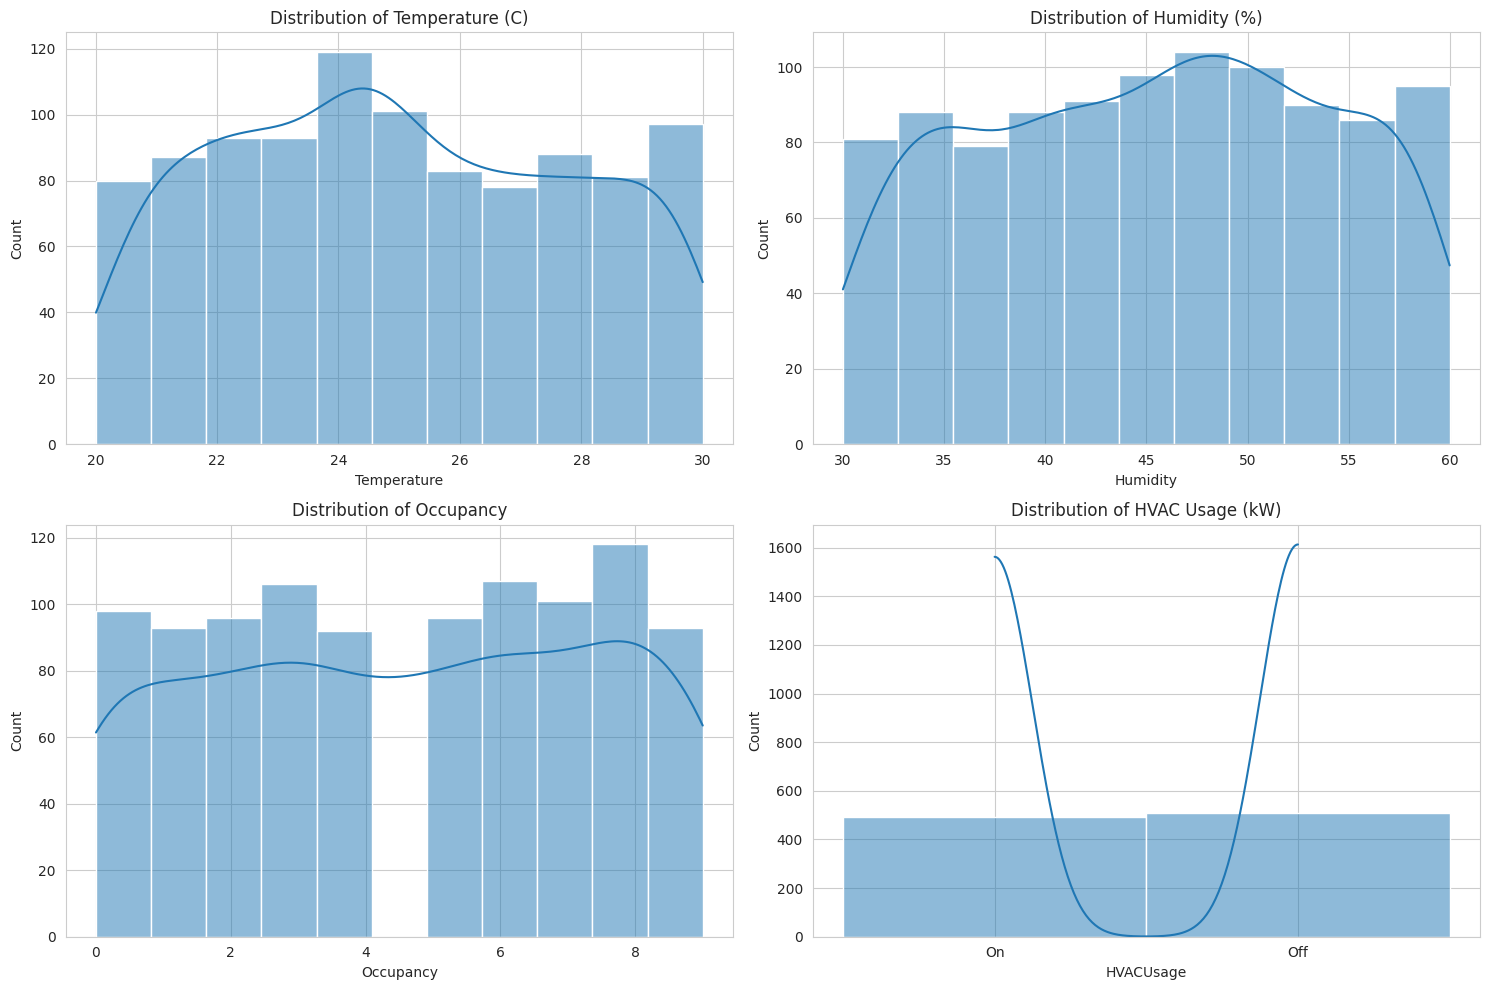

In [ ]:
# Set the style for the plots
sns.set_style("whitegrid")

# Create histograms for key features
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['Temperature'], kde=True)
plt.title('Distribution of Temperature (C)')

plt.subplot(2, 2, 2)
sns.histplot(data['Humidity'], kde=True)
plt.title('Distribution of Humidity (%)')

plt.subplot(2, 2, 3)
sns.histplot(data['Occupancy'], kde=True)
plt.title('Distribution of Occupancy')

plt.subplot(2, 2, 4)
sns.histplot(data['HVACUsage'], kde=True)
plt.title('Distribution of HVAC Usage (kW)')

plt.tight_layout()
plt.show()


In [ ]:
# Convert 'Timestamp' to datetime objects
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [ ]:
# map the columns
data['Holiday'] = data['Holiday'].map({'No': 0, 'Yes': 1})
data['HVACUsage'] = data['HVACUsage'].map({'Off': 0, 'On': 1})
data['LightingUsage'] = data['LightingUsage'].map({'Off': 0, 'On': 1})

data.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,Monday,0,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,Saturday,0,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,Sunday,0,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,Wednesday,0,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,Friday,0,70.811732


In [ ]:
# map the days of the week to numbers
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# Apply the mapping to the 'DayOfWeek' column
if 'DayOfWeek' in data.columns:
    data['DayOfWeek'] = data['DayOfWeek'].map(day_mapping)
else:
    print("Error: 'DayOfWeek' column not found. Please create it first.")

data.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,0,0,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,5,0,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,6,0,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,2,0,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,4,0,70.811732


In [ ]:
data1 = data.drop(columns=['Timestamp'])


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to the numerical features and transform the data
data_scaled_array = scaler.fit_transform(data1) # Keep the NumPy array in a variable

# Convert the scaled NumPy array back to a DataFrame
# Use the columns from the original data1 DataFrame
data_scaled = pd.DataFrame(data_scaled_array, columns=data1.columns)


data1.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,25.139433,43.431581,1565.693999,5,1,0,2.774699,0,0,75.364373
1,27.731651,54.225919,1411.064918,1,1,1,21.831384,5,0,83.401855
2,28.704277,58.907658,1755.715009,2,0,0,6.764672,6,0,78.270888
3,20.080469,50.371637,1452.316318,1,0,1,8.623447,2,0,56.519850
4,23.097359,51.401421,1094.130359,9,1,0,3.071969,4,0,70.811732


In [ ]:
data1.EnergyConsumption.nunique()

data1.EnergyConsumption.value_counts()

,count
EnergyConsumption,
71.545311,1
75.364373,1
83.401855,1
78.270888,1
56.519850,1
...,...
84.144776,1
73.278670,1
82.274434,1


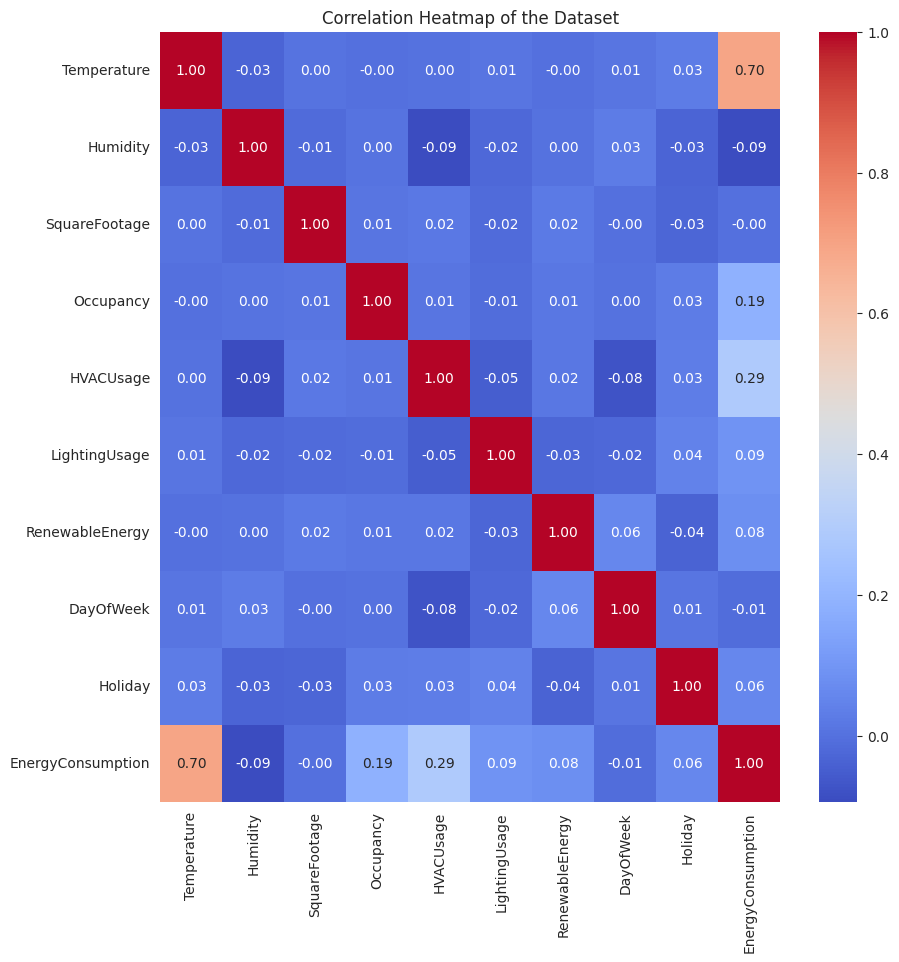

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(), annot=True, fmt=".2f", cmap="coolwarm") # Added annot and fmt for better readability
plt.title('Correlation Heatmap of the Dataset')
plt.show()



In [ ]:
X = data_scaled.drop(columns=['EnergyConsumption'])
y = data_scaled['EnergyConsumption']

from sklearn.model_selection import train_test_split
# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(mean_squared_error(y_test, y_pred))
print("Score:",model.score(x_test,y_test))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("r2_score: ",r2)
print("mean absolute error:",mae)

0.3908307677501186
Score: 0.6034196010827899
r2_score:  0.6034196010827899
mean absolute error: 0.49859292878303063


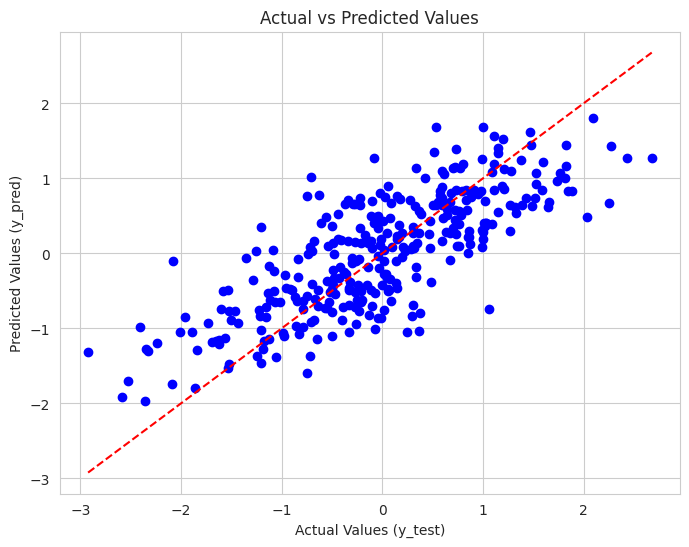

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')

# Add a line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Add labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
model_R =RandomForestRegressor()
model_R.fit(x_train, y_train)
y_pred_R = model.predict(x_test)
print(mean_squared_error(y_test, y_pred_R))
print("Score_R:",model_R.score(x_test,y_test))
r2_R = r2_score(y_test, y_pred_R)
mae_R = mean_absolute_error(y_test, y_pred_R)
print("r2_score_R: ",r2_R)
print("mean absolute error_R:",mae_R)

0.3908307677501186
Score_R: 0.5251672510235751
r2_score_R:  0.6034196010827899
mean absolute error_R: 0.49859292878303063


In [ ]:
#import xGboost
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
model_X = XGBRegressor()
model_X.fit(x_train, y_train)
y_pred_X = model_X.predict(x_test)
print(mean_squared_error(y_test, y_pred_X))
print("Score_X:",model_X.score(x_test,y_test))
r2_X = r2_score(y_test, y_pred_X)
mae_X = mean_absolute_error(y_test, y_pred_X)
print("r2_score_X: ",r2_X)
print("mean absolute error_X:",mae_X)


0.5053882933601075
Score_X: 0.4871767846154209
r2_score_X:  0.4871767846154209
mean absolute error_X: 0.5626730244011634
